In [1]:
!pip install grid2op

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 54.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 81.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 KB 8.2 MB/s eta 0:00:00
  Created wheel for grid2op: filename=Grid2Op-1.8.1-py3-none-any.whl size=12511545 sha256=8f1579b6b5e9ddbae95c4fbe05ae7a241deedf29dfcaba5b12fa63e33c0a041d
  Stored in directory: /root/.cache/pip/wheels/39/e2/42/f3795a0fd8dc992979028cb86a283ab1bf31a8639e599b88cc
  Created wheel for pandapower: filename=pandapower-2.11.1-py3-none-any.whl size=6164023 sha256=7666edec6506b73c88905cebcffbb76e45c5731044fbe6c461449e7d3c9c3e7e
  Stored in directory: /root/.cache/pip/wheels/99/fe/ca/584068

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [3]:
import os
from grid2op import make

# Initialize the env.
environment = make("rte_case5_example", test=True)

/usr/local/lib/python3.9/dist-packages/grid2op/MakeEnv/Make.py:393: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


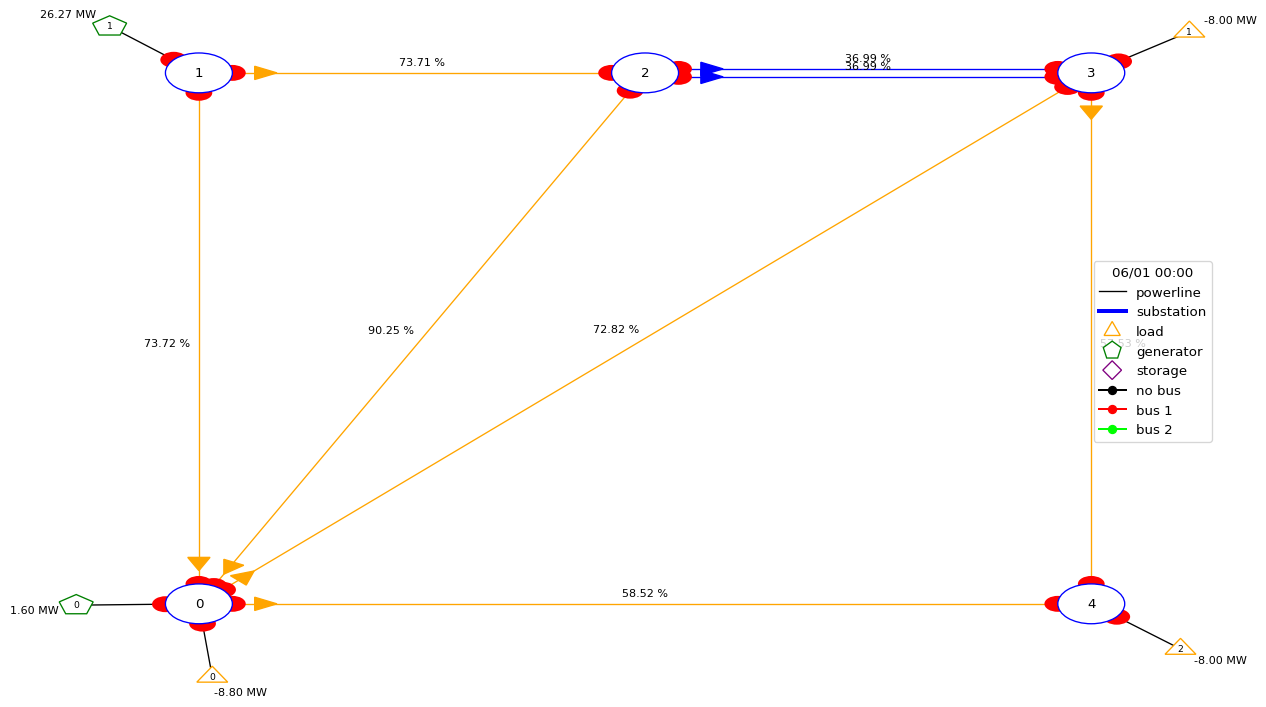

In [4]:
from grid2op.PlotGrid import PlotMatplot

plot_helper = PlotMatplot(observation_space=environment.observation_space)

fig = plot_helper.plot_obs(environment.get_obs())

In [7]:
def sim(action, 
        t_action=0):
    
    # Restart all the game from the scratch.
    env = None
    env = make("rte_case5_example", test=True)    
    obs_as_class = None
    obs_as_vect = None
    # Iterating process..
    for i in range(t_action+1):
        obs_as_class, reward, done, info = env.step(action)
        obs_as_vect = obs_as_class.to_vect()
        if done:
            raise RuntimeError("Impossible to complete the scenario. GAME OVER.")
    return env, obs_as_class, obs_as_vect

In [8]:
# DoNothing agent

action_space = environment.action_space
observation_space = environment.observation_space

# Create do_nothing action.
agent_action = action_space({}) # this is the do nothing action agent

In [9]:
from PIL import Image

# Create the output folder if it doesn't exist
output_folder = 'saved_plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def safe_sim(action, t_action):
    try:
        env, obs, osb_as_vect = sim(agent_action, t_action=t_action)
        return env, obs, osb_as_vect, True
    except RuntimeError as e:
        print(f"Error at step {t_action}: {e}")
        return None, None, None, False


# Save the plots as PNG files
# 100_000 is the maximal number you want to plot
# The plot will stop if the game end

for x in range(100_000):
    env, obs, osb_as_vect, success = safe_sim(agent_action, t_action=x)
    if success:
        fig = plot_helper.plot_obs(obs)
        png_filename = os.path.join(output_folder, f'saved_plots_{x:03d}.png')
        plt.savefig(png_filename)
        plt.close(fig)
    else:
        break

# Collect all saved PNG files
png_files = [os.path.join(output_folder, f'saved_plots_{x:03d}.png') for x in range(x)]

# Open the first image and convert it to RGB mode
first_image = Image.open(png_files[0]).convert('RGB')

# Create a list to store the rest of the images
other_images = []

# Open, convert, and append the rest of the images
for png_file in png_files[1:]:
    img = Image.open(png_file).convert('RGB')
    other_images.append(img)

# Save the images as an animated GIF
animated_gif_path = os.path.join(output_folder, 'agent_animated.gif')
first_image.save(animated_gif_path, save_all=True, append_images=other_images, duration=100, loop=0)

# Close all the images
first_image.close()
for img in other_images:
    img.close()


/usr/local/lib/python3.9/dist-packages/grid2op/MakeEnv/Make.py:393: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)
/usr/local/lib/python3.9/dist-packages/grid2op/MakeEnv/Make.py:393: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)
/usr/local/lib/python3.9/dist-packages/grid2op/MakeEnv/Make.py:393: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings

Error at step 118: Impossible to complete the scenario. GAME OVER.
